In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms

from IPython.core.pylabtools import figsize


In [103]:
import sys

sys.path.append('../src')

from data_preprocessing import df, X_scaled,  y

df.head()



,holiday,weekday,summertime,temp,dew,humidity,precip,windspeed,cloudcover,visibility,...,hour_of_the_day_sin,hour_of_the_day_cos,day_0,day_1,day_2,day_3,day_4,day_5,day_6,snow_or_not
0,0,0,0,-7.2,-15.0,53.68,0.0,16.3,31.6,16.0,...,0.965926,0.258819,False,False,False,False,False,True,False,0
1,0,1,0,-1.3,-12.8,40.97,0.0,23.9,85.7,16.0,...,-0.707107,0.707107,False,False,False,False,True,False,False,0
2,0,1,1,26.9,21.8,73.39,0.0,0.0,81.1,16.0,...,-0.707107,0.707107,False,False,False,True,False,False,False,0
3,0,0,0,3.1,-4.0,59.74,0.0,19.2,0.0,16.0,...,0.258819,0.965926,False,False,False,False,False,False,True,0
4,0,1,0,11.7,-11.4,18.71,0.0,10.5,44.6,16.0,...,-0.965926,-0.258819,True,False,False,False,False,False,False,0


In [ ]:
pd.plotting.scatter_matrix(X_scaled.iloc[:, 1:18], figsize=(10,10))
plt.show()

kNN

In [34]:
np.random.seed(1)
trainI = np.random.choice(X_scaled.shape[0], size=300, replace=True)
trainIndex = X_scaled.index.isin(trainI)
train = X_scaled.iloc[trainIndex]
test = X_scaled.iloc[~trainIndex]

In [117]:
X_train = train
X_test = test
y_train = y.loc[train.index]
y_test = y.loc[test.index]

In [118]:
model = skl_nb.KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)

print('model summary')
print(model)

model summary
KNeighborsClassifier(n_neighbors=11)


In [119]:
prediction = model.predict(X_test)
print('Confusion maatrix :\n')
print(pd.crosstab(prediction, y_test), ':\n')
print(f"Accuracy: {np.mean(prediction == y_test):.3f}")

Confusion maatrix :

increase_stock    high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                17                3
low_bike_demand                222             1088 :

Accuracy: 0.831


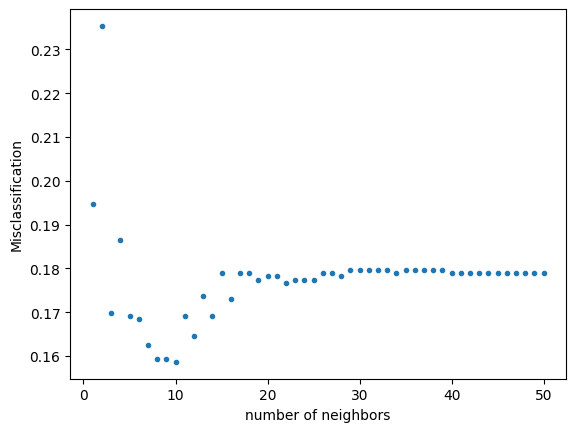

In [44]:
misclassification = []

for k in range(50):
    model = skl_nb.KNeighborsClassifier(n_neighbors=k+1)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    misclassification.append(np.mean(prediction != y_test))

K = np.linspace(1, 50, 50)
plt.plot(K, misclassification, '.')
plt.ylabel('Misclassification')
plt.xlabel('number of neighbors')
plt.show()

*Cross validation*
rekommenderas för kNN

In [48]:
X_scaled[:10]

,holiday,weekday,summertime,temp,dew,humidity,precip,windspeed,cloudcover,visibility,...,hour_of_the_day_sin,hour_of_the_day_cos,day_0,day_1,day_2,day_3,day_4,day_5,day_6,snow_or_not
0,-0.185094,-1.564697,-1.344254,-2.419627,-2.269781,-0.537283,-0.132609,0.414935,-0.999503,0.282338,...,1.371739,0.367380,-0.420084,-0.389754,-0.402425,-0.399275,-0.422141,2.422179,-0.410775,-0.193942
1,-0.185094,0.639101,-1.344254,-1.782607,-2.050293,-1.203654,-0.132609,1.395045,0.652979,0.282338,...,-1.013450,0.996355,-0.420084,-0.389754,-0.402425,-0.399275,2.368875,-0.412851,-0.410775,-0.193942
2,-0.185094,0.639101,0.743907,1.262128,1.401656,0.496090,-0.132609,-1.687144,0.512472,0.282338,...,-1.013450,0.996355,-0.420084,-0.389754,-0.402425,2.504541,-0.422141,-0.412851,-0.410775,-0.193942
3,-0.185094,-1.564697,-1.344254,-1.307542,-1.172340,-0.219564,-0.132609,0.788924,-1.964724,0.282338,...,0.363639,1.359495,-0.420084,-0.389754,-0.402425,-0.399275,-0.422141,-0.412851,2.434421,-0.193942
4,-0.185094,0.639101,-1.344254,-0.379006,-1.910618,-2.370721,-0.132609,-0.333044,-0.602419,0.282338,...,-1.382440,-0.358899,2.380476,-0.389754,-0.402425,-0.399275,-0.422141,-0.412851,-0.410775,-0.193942
5,-0.185094,0.639101,0.743907,1.283722,0.503750,-1.203130,-0.132609,0.066738,0.518581,0.282338,...,-1.382440,-0.358899,-0.420084,-0.389754,-0.402425,2.504541,-0.422141,-0.412851,-0.410775,-0.193942
6,-0.185094,0.639101,0.743907,1.694005,1.651074,0.198294,-0.132609,0.930783,-0.428313,0.282338,...,-1.240015,0.705772,-0.420084,-0.389754,-0.402425,-0.399275,2.368875,-0.412851,-0.410775,-0.193942
7,-0.185094,0.639101,-1.344254,-1.113198,-0.942876,-0.076957,-0.132609,1.085537,1.089771,0.282338,...,-0.005351,1.407303,-0.420084,2.565724,-0.402425,-0.399275,-0.422141,-0.412851,-0.410775,-0.193942
8,-0.185094,0.639101,-1.344254,0.150044,0.603517,1.029292,-0.132609,0.647066,0.750722,0.282338,...,-1.431019,0.004240,2.380476,-0.389754,-0.402425,-0.399275,-0.422141,-0.412851,-0.410775,-0.193942
9,-0.185094,-1.564697,-1.344254,-2.128109,-1.990432,-0.460737,-0.132609,-0.088017,-1.219427,0.282338,...,1.371739,-0.358899,-0.420084,-0.389754,-0.402425,-0.399275,-0.422141,2.422179,-0.410775,-0.193942


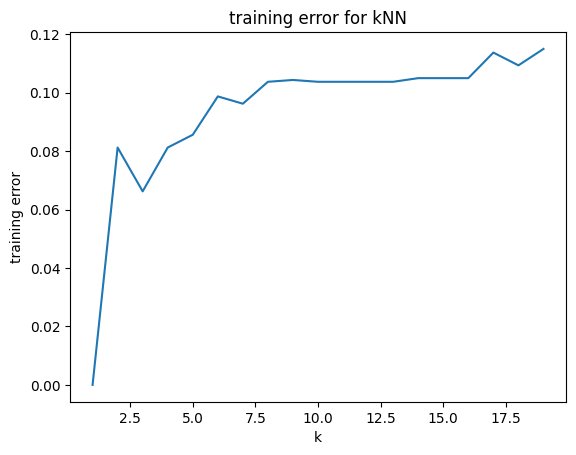

In [75]:
#from excercise 6.1 a)
np.random.seed(1)


misclassification = []

K = np.arange(1,20)
for k in K:
    model = skl_nb.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_scaled, y)
    prediction = model.predict(X_scaled)
    misclassification.append(np.mean(prediction != y))

plt.plot(K, misclassification)
plt.title('training error for kNN')
plt.xlabel('k')
plt.ylabel('training error')

plt.show()
    

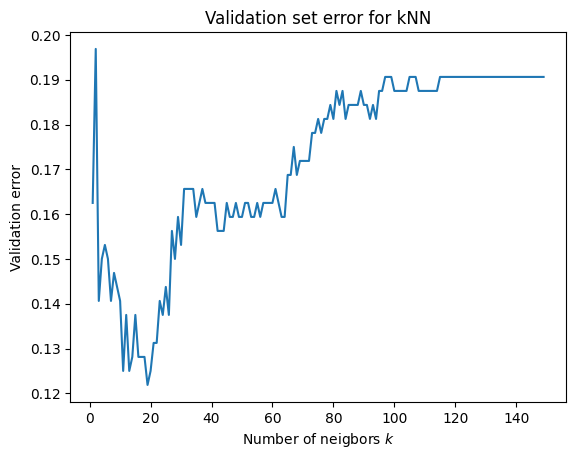

In [76]:
#from excercise 6.1 b)
np.random.seed(1)

N = len(X_scaled)
M = np.ceil(0.8*N).astype(int)

idx = np.random.permutation(N)
X_train, X_val = X_scaled.iloc[idx[:M]], X_scaled.iloc[idx[M:]]
y_train, y_val = y.iloc[idx[:M]],  y.iloc[idx[M:]]

misclassification = []

K = np.arange(1,150)
for k in K:
    model = skl_nb.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    misclassification.append(np.mean(prediction != y_val))

plt.plot(K, misclassification)
plt.title('Validation set error for kNN')
plt.xlabel('Number of neigbors $k$')
plt.ylabel('Validation error')
plt.show()

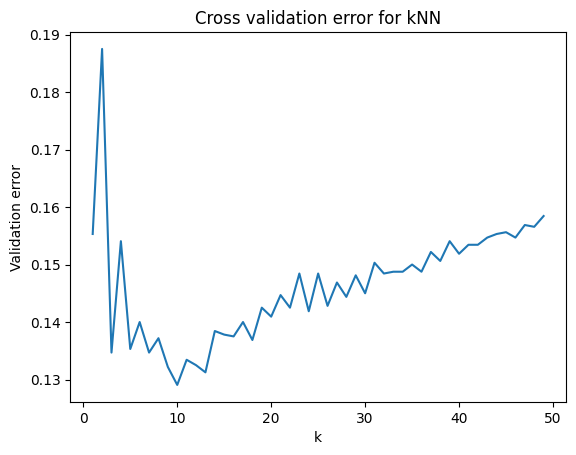

In [ ]:
n_runs = 10
K = np.arange(1,50)

misclassification = np.zeros((n_runs, len(K)))
for i in range(n_runs):
    X_train, X_val, y_train, y_val = skl_ms.train_test_split(X_scaled, y, test_size=0.2)

    for j, k in enumerate(K):
        model = skl_nb.KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        prediction = model.predict(X_val)
        misclassification[i, j] = (np.mean(prediction != y_val))

avarage_mis = np.mean(misclassification, axis=0)

plt.plot(K, avarage_mis)
plt.title('Cross validation error for kNN')
plt.xlabel('k')
plt.ylabel('Validation error')
plt.show()

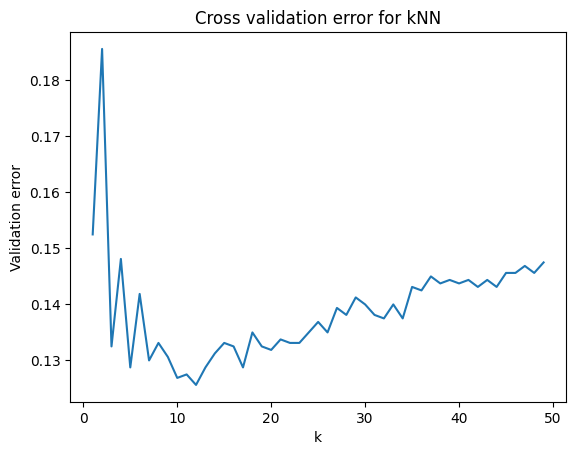

Average misclassification for 8: 0.13063
Average misclassification for 9: 0.12688
Average misclassification for 10: 0.12750
Average misclassification for 11: 0.12563
Average misclassification for 12: 0.12875
Average misclassification for 13: 0.13125
Average misclassification for 14: 0.13312


In [130]:
n_fold = 10

cv = skl_ms.KFold(n_splits=n_fold, random_state=2,shuffle=True)
K = np.arange(1,50)
misclassification = np.zeros(len(K))

for train_index, val_index in cv.split(X_scaled):
    X_train, X_val = X_scaled.iloc[train_index], X_scaled.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    for j, k in enumerate(K):
        model = skl_nb.KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        prediction = model.predict(X_val)
        misclassification[j] += np.mean(prediction != y_val)

misclassification /= n_fold
plt.plot(K, misclassification)
plt.title('Cross validation error for kNN')
plt.xlabel('k')
plt.ylabel('Validation error')
plt.show()


for k_index in range (8,15):
    print(f"Average misclassification for {k_index}: {misclassification[k_index]:.5f}")